## 2.3.9. 신경망(딥러닝)

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import scipy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

ERROR! Session/line number was not unique in database. History logging moved to new session 134


Text(0, 0.5, 'relu(x), tanh(x)')

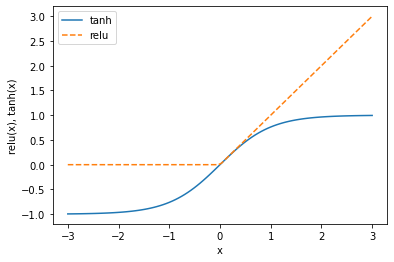

In [2]:
line = np.linspace(-3,3,100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), linestyle='--', label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

Text(0, 0.5, 'feat 1')

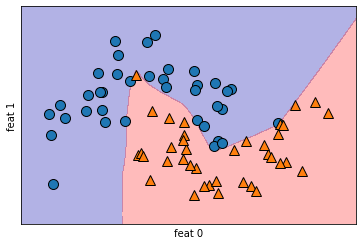

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver="lbfgs", random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("feat 0")
plt.ylabel("feat 1")

현재 사용된 은닉 유닛은 100개로(기본값) 현재 데이터셋에선 너무 많음

Text(0, 0.5, 'feat 1')

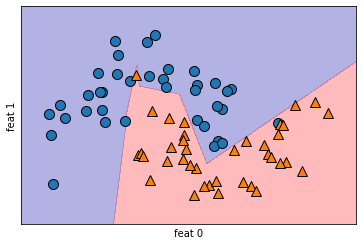

In [8]:
mlp = MLPClassifier(solver="lbfgs", random_state=0, hidden_layer_sizes=[10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("feat 0")
plt.ylabel("feat 1")

Text(0, 0.5, 'feat 1')

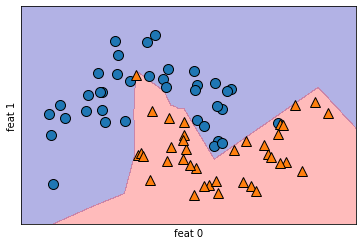

In [12]:
# 10개의 은닉층이 2개인 모델
mlp = MLPClassifier(solver="lbfgs",
                   random_state=0, hidden_layer_sizes=[10, 10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("feat 0")
plt.ylabel("feat 1")

Text(0, 0.5, 'feat 1')

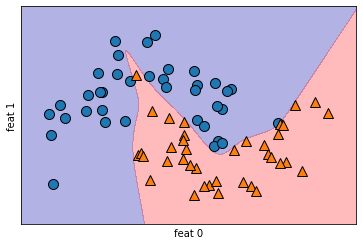

In [10]:
# tanh 활성화 함수가 적용된 10개의 유닛으로 된 두 개의 은닉층

mlp = MLPClassifier(solver="lbfgs", activation="tanh",
                   random_state=0, hidden_layer_sizes=[10, 10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("feat 0")
plt.ylabel("feat 1")

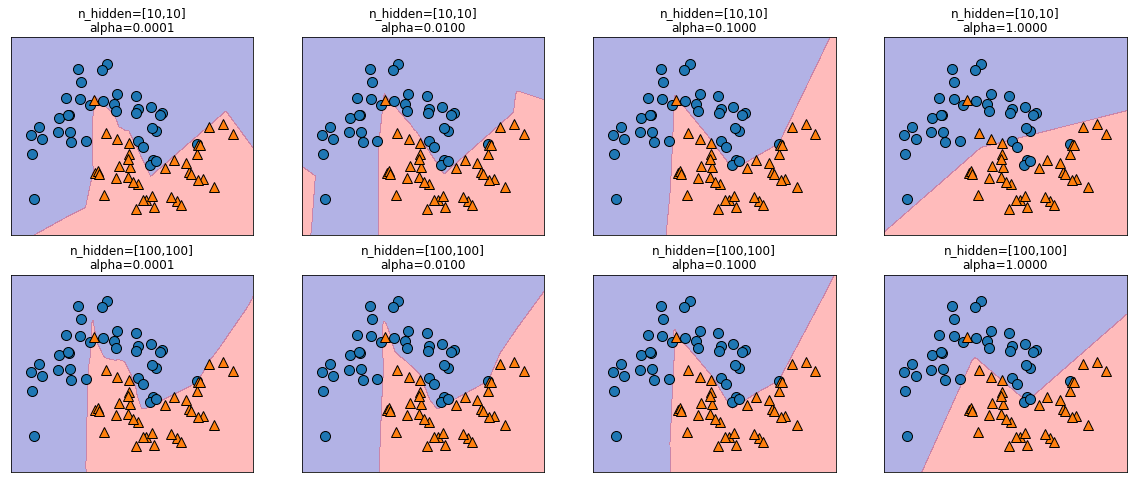

In [15]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10,100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, max_iter=1000,
                           hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                           alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
        ax.set_title("n_hidden=[{},{}]\nalpha={:.4f}".format(n_hidden_nodes,
                                                            n_hidden_nodes,
                                                            alpha))

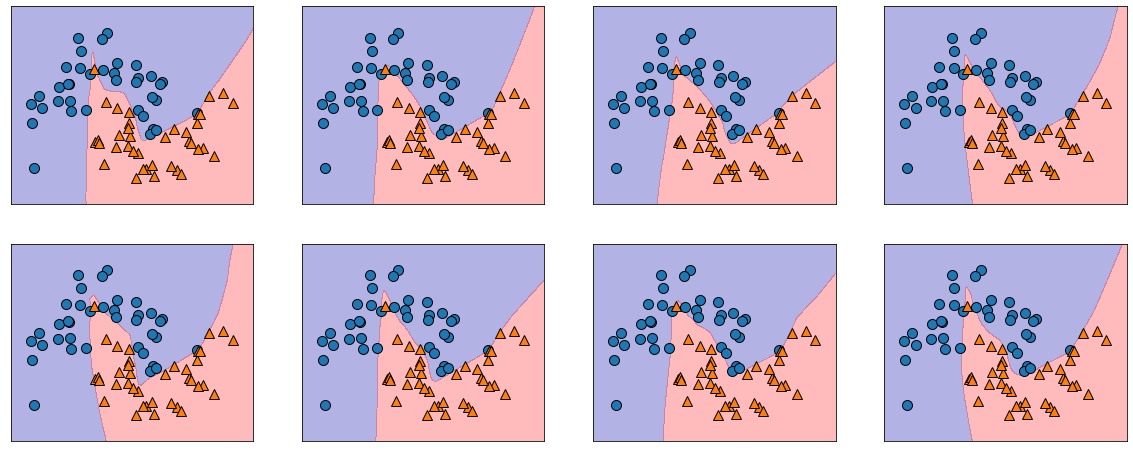

In [16]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                       hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)

In [23]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print("유방암 데이터의 특성별 최댓값 : \n", cancer.data.max(axis=0))

유방암 데이터의 특성별 최댓값 : 
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [25]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                   cancer.target,
                                                   random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("train set acc : {:.2f}".format(mlp.score(X_train, y_train)))
print("test set acc : {:.2f}".format(mlp.score(X_test, y_test)))

train set acc : 0.94
test set acc : 0.92


#### 정규화

In [26]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("train set acc : {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("test set acc : {:.3f}".format(mlp.score(X_test_scaled, y_test)))

train set acc : 0.991
test set acc : 0.965


/Users/jeongseunghwan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


반복횟수가 한계에 도달했음을 의미하는 경고 -> 반복횟수를 늘려줘야함

In [30]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("train set acc : {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("test set acc : {:.3f}".format(mlp.score(X_test_scaled, y_test)))

train set acc : 1.000
test set acc : 0.972


정확도가 증가했지만 과대적합의 성격을 보임 -> 규제 강화 alpha값 조정(0.0001 > 1)

In [31]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("train set acc : {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("test set acc : {:.3f}".format(mlp.score(X_test_scaled, y_test)))

train set acc : 0.988
test set acc : 0.972


현재까지 가장 좋은 모델과 성능이 동일하다

Text(0, 0.5, 'input feature')

ERROR! Session/line number was not unique in database. History logging moved to new session 135


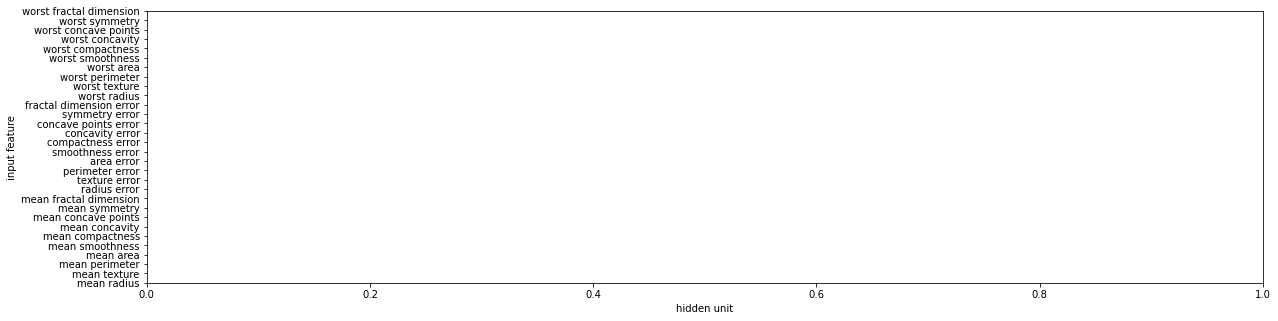

In [33]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='non', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('hidden unit')
plt.ylabel('input feature')
plt.colorbar()